__IN-Class__

Read in the following csv files. These are US higher education enrollment data.

chars = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/HD2021.zip', 
                    compression='zip',
                    encoding="ISO-8859-1")

enr = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/EFFY2021.zip',
                  compression='zip',encoding="ISO-8859-1")
                  

- Retain INSTNM,  STABBR, CONTROL and UNITID from chars.  
- Only retain enr records where EFFYALEV = 1 (all credit seeking students).
- Retain EFYTOTLT and UNITID from enr.  

CONTROL (1=public, 2=private, 3=for profit) drop -3.

UNITID can be used to join these two DataFrames. 

Listwise drop records with any null values.

INSTNM = school
STABBR = state
CONTROL = control
EFYTOTLT = enrollment

_Try to address the first task below. If you have time attempt the second and third items._

1. Using subplots in conjunction with sns plotting functions plot a histogram of total enrollment and overlay the cummulative distribution function on top of it.  There may be some extreme enrollment values, so think about an appropriate approach for excluding records that will allow us to get a good view of the distribution.

2. Compare the enrollment distributionss of public, private and for profit institutions.

3. Plot the enrollment distribution of Colorado institutions, and try to call out DU's enrollment specifically.

The preliminary cleaning steps are provided below so you can focus on the plotting.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chars = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/HD2021.zip', 
                    compression='zip',
                    encoding="ISO-8859-1")

In [3]:
! curl -O https://nces.ed.gov/ipeds/datacenter/data/EFFY2021.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5415k  100 5415k    0     0   746k      0  0:00:07  0:00:07 --:--:-- 1004k


In [4]:
! unzip EFFY2021.zip

Archive:  EFFY2021.zip
  inflating: effy2021.csv            
  inflating: effy2021_rv.csv         


In [5]:
enr = pd.read_csv('effy2021.csv',
                  encoding="ISO-8859-1")

In [6]:
chars = chars[['UNITID', 'INSTNM', 'STABBR', 'CONTROL']]

enr = enr.loc[enr['EFFYALEV'] == 1, ['UNITID', 'EFYTOTLT']]

data = pd.merge(chars, enr, how='left', on='UNITID')

In [7]:
data.dropna(how='any', axis=0, inplace=True)

In [8]:
data.rename(columns={'INSTNM': 'school',
                    'STABBR': 'state',
                    'CONTROL': 'control',
                    'EFYTOTLT': 'enrollment'},
           inplace=True)

In [9]:
data['control'] = data['control'].map({1: 'public', 2: 'private', 3: 'for-profit'})

# Task 1

In [10]:
print(data.info())
print(data.head(n=10))

<class 'pandas.core.frame.DataFrame'>
Index: 6086 entries, 0 to 6286
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UNITID      6086 non-null   int64  
 1   school      6086 non-null   object 
 2   state       6086 non-null   object 
 3   control     6086 non-null   object 
 4   enrollment  6086 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 285.3+ KB
None
    UNITID                               school state  control  enrollment
0   100654             Alabama A & M University    AL   public      6628.0
1   100663  University of Alabama at Birmingham    AL   public     26327.0
2   100690                   Amridge University    AL  private      1087.0
3   100706  University of Alabama in Huntsville    AL   public     11318.0
4   100724             Alabama State University    AL   public      4478.0
6   100751            The University of Alabama    AL   public     41992.0
7   100760    Cent

<Axes: xlabel='enrollment', ylabel='Count'>

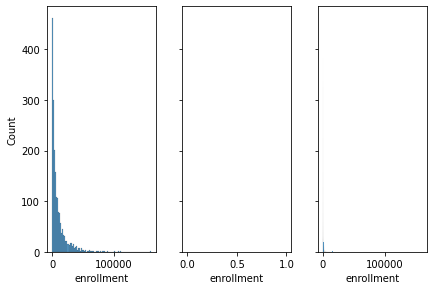

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
plt.tight_layout()
sns.histplot(ax=ax1, data=data[data["control"] == "public"], x="enrollment")
sns.histplot(ax=ax2, data=data[data["control"] == "privte"], x="enrollment")
sns.histplot(ax=ax3, data=data[data["control"] == "for-profit"], x="enrollment")